In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets
import numpy as np

In [2]:
full_data_row = pd.read_excel(r"C:\Users\66910\Downloads\BelgorodWeather\full_data_gotnya_2023.xlsx")
full_data_row

,start,end,long,minday,minfday,meanperiod,gsop,year,mean_year
0,1936-10-03,1937-04-20,199,-21.0,-18.76,-1.93,3966.0,1937,6.866911
1,1937-10-05,1938-04-20,197,-17.1,-14.82,-1.01,3745.0,1938,7.656839
2,1938-10-27,1939-04-09,164,-19.2,-18.36,-2.97,3439.0,1939,6.809974
3,1939-09-27,1940-04-19,205,-32.4,-27.02,-3.99,4508.0,1940,5.069836
4,1945-10-02,1946-04-22,202,-19.5,-17.88,-2.44,4129.0,1946,6.423954
...,...,...,...,...,...,...,...,...,...
75,2018-09-30,2019-04-09,191,-16.9,-10.92,-0.12,3461.0,2019,8.942503
76,2019-09-24,2020-03-08,166,-10.5,-8.10,2.73,2535.0,2020,9.169090
77,2020-10-21,2021-04-13,174,-20.9,-17.46,-1.13,3329.0,2021,7.799281
78,2021-10-01,2022-04-02,183,-15.9,-11.96,0.00,3294.0,2022,7.950000


In [3]:
full_data_row

,start,end,long,minday,minfday,meanperiod,gsop,year,mean_year
0,1936-10-03,1937-04-20,199,-21.0,-18.76,-1.93,3966.0,1937,6.866911
1,1937-10-05,1938-04-20,197,-17.1,-14.82,-1.01,3745.0,1938,7.656839
2,1938-10-27,1939-04-09,164,-19.2,-18.36,-2.97,3439.0,1939,6.809974
3,1939-09-27,1940-04-19,205,-32.4,-27.02,-3.99,4508.0,1940,5.069836
4,1945-10-02,1946-04-22,202,-19.5,-17.88,-2.44,4129.0,1946,6.423954
...,...,...,...,...,...,...,...,...,...
75,2018-09-30,2019-04-09,191,-16.9,-10.92,-0.12,3461.0,2019,8.942503
76,2019-09-24,2020-03-08,166,-10.5,-8.10,2.73,2535.0,2020,9.169090
77,2020-10-21,2021-04-13,174,-20.9,-17.46,-1.13,3329.0,2021,7.799281
78,2021-10-01,2022-04-02,183,-15.9,-11.96,0.00,3294.0,2022,7.950000


In [4]:
# ЗАПУСКАТЬ 1 РАЗ!!!
#Установили колонку year в качестве индекса
full_data_row.set_index('year',inplace=True)

In [5]:
# выбрали объекты после 1988 года
dataset = full_data_row[['mean_year']].loc[1988:]
# Сделали колонку с годом
dataset['year'] = dataset.index
# дропнули индекс
dataset.reset_index(drop=True, inplace=True)
dataset

,mean_year,year
0,5.934740,1988
1,8.190429,1989
2,7.531340,1990
3,6.735979,1991
4,6.611072,1992
5,5.307280,1993
6,6.212675,1994
7,7.324824,1995
8,5.858317,1996
9,5.800924,1997


## Обучение на сырых данных

In [6]:
# делим выборку на признак и таргет
X = dataset[['year']]
y = dataset[['mean_year']]

In [7]:
# Определение размера тестового набора
test_size = 0.2
# Вычисление количества элементов в тестовом наборе
test_count = int(len(X) * test_size)
X_train = X[:-test_count]
y_train = y[:-test_count]
X_test = X[-test_count:]
y_test = y[-test_count:]

In [8]:
# Создаем экземпляр линейной регрессии
regr = LinearRegression()

In [9]:
# Обучаем регрессию на данных
regr.fit(X_train, y_train)

LinearRegression()

In [10]:
# записываем x тест в переменную
y_pred = regr.predict(X_test)

In [11]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [[0.05418378]]
Mean squared error: 0.35
Coefficient of determination: 0.00


In [12]:
std_dev = np.std(y_test - y_pred)
std_dev

mean_year    0.574332
dtype: float64

## Предсказываем температуру на 2050

In [13]:
feature_value = np.array([[2050]])
# Предсказываем значение целевой переменной для данного значения признака
predicted_value = regr.predict(feature_value)
print("Предсказанное значение для признака, равного 2050:", predicted_value)

Предсказанное значение для признака, равного 2050: [[9.79639099]]


C:\Users\66910\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [14]:
feature_value = np.array([i for i in range(2023,2051)]).reshape(-1, 1)

# Предсказываем значение целевой переменной для данного значения признака
predicted_value = regr.predict(feature_value)

print("Предсказанное значение для признака, равного 2050:", predicted_value)

Предсказанное значение для признака, равного 2050: [[8.3334289 ]
 [8.38761268]
 [8.44179646]
 [8.49598024]
 [8.55016402]
 [8.60434781]
 [8.65853159]
 [8.71271537]
 [8.76689915]
 [8.82108293]
 [8.87526671]
 [8.92945049]
 [8.98363427]
 [9.03781806]
 [9.09200184]
 [9.14618562]
 [9.2003694 ]
 [9.25455318]
 [9.30873696]
 [9.36292074]
 [9.41710452]
 [9.47128831]
 [9.52547209]
 [9.57965587]
 [9.63383965]
 [9.68802343]
 [9.74220721]
 [9.79639099]]


C:\Users\66910\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Отрисовка

In [15]:
# записываем x тест в переменную
y_pred_2023= regr.predict(X)

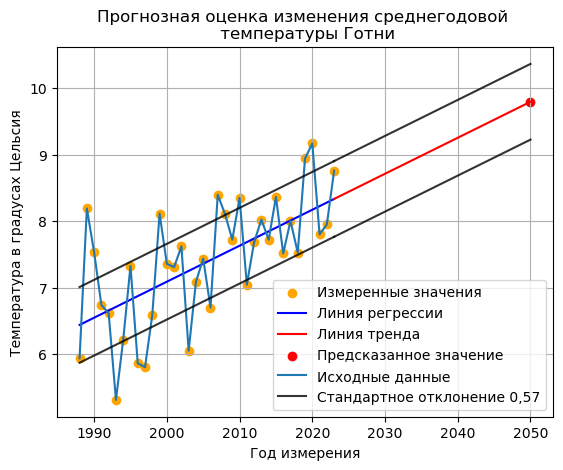

In [17]:
plt.scatter(X, y, color='orange', label='Измеренные значения')
plt.plot(X, regr.predict(X), color='blue', label='Линия регрессии')
plt.plot(feature_value, predicted_value, color='red', label='Линия тренда')
plt.scatter(2050, 9.79639099 , color='red', label='Предсказанное значение')
plt.plot(X, y, label='Исходные данные')
plt.plot(X, y_pred_2023 - 0.57, color='black', alpha=0.8)
plt.plot(X, y_pred_2023 + 0.57, color='black', alpha=0.8)
plt.plot(feature_value, predicted_value - 0.57, color='black', alpha=0.8)
plt.plot(feature_value, predicted_value + 0.57, color='black', alpha=0.8,
         label='Стандартное отклонение 0,57')
plt.ylabel('Температура в градусах Цельсия')
plt.title('Прогнозная оценка изменения среднегодовой \n температуры Готни')
plt.xlabel('Год измерения')
plt.legend()
plt.grid(True)
plt.show()

## Продожительности отопительных периодов

In [18]:
full_data_row
full_data_row.set_index('year',inplace=True)

KeyError: "None of ['year'] are in the columns"

In [19]:
full_data_row

,start,end,long,minday,minfday,meanperiod,gsop,mean_year
year,,,,,,,,
1937,1936-10-03,1937-04-20,199,-21.0,-18.76,-1.93,3966.0,6.866911
1938,1937-10-05,1938-04-20,197,-17.1,-14.82,-1.01,3745.0,7.656839
1939,1938-10-27,1939-04-09,164,-19.2,-18.36,-2.97,3439.0,6.809974
1940,1939-09-27,1940-04-19,205,-32.4,-27.02,-3.99,4508.0,5.069836
1946,1945-10-02,1946-04-22,202,-19.5,-17.88,-2.44,4129.0,6.423954
...,...,...,...,...,...,...,...,...
2019,2018-09-30,2019-04-09,191,-16.9,-10.92,-0.12,3461.0,8.942503
2020,2019-09-24,2020-03-08,166,-10.5,-8.10,2.73,2535.0,9.169090
2021,2020-10-21,2021-04-13,174,-20.9,-17.46,-1.13,3329.0,7.799281


In [20]:
# выбрали объекты после 1988 года
long = full_data_row[['long']].loc[1988:]
# Сделали колонку с годом
long['year'] = long.index
# дропнули индекс
long.reset_index(drop=True, inplace=True)
long

,long,year
0,201,1988
1,180,1989
2,169,1990
3,188,1991
4,168,1992
5,212,1993
6,202,1994
7,184,1995
8,214,1996
9,219,1997


## Регрессия на продолжительности суток

In [21]:
# делим выборку на признак и таргет
X = long[['year']]
y = long[['long']]

# Определение размера тестового набора
test_size = 0.2

# Вычисление количества элементов в тестовом наборе
test_count = int(len(X) * test_size)
X_train = X[:-test_count]
y_train = y[:-test_count]
X_test = X[-test_count:]
y_test = y[-test_count:]

# Создаем экземпляр линейной регрессии
regr = LinearRegression()

# Обучаем регрессию на данных
regr.fit(X_train, y_train)

# записываем x тест в переменную
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [[-0.41231527]]
Mean squared error: 129.40
Coefficient of determination: 0.10


In [22]:
std_dev_long = np.std(y_test - y_pred)
round(std_dev_long,0)

long    11.0
dtype: float64

In [23]:
feature_value_2050_long = np.array([[2050]])
# Предсказываем значение целевой переменной для данного значения признака
predicted_value_2050_long = regr.predict(feature_value_2050_long)
print("Предсказанное значение для признака, равного 2050:", predicted_value_2050_long)

Предсказанное значение для признака, равного 2050: [[166.96748768]]


C:\Users\66910\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [24]:
feature_value = np.array([i for i in range(2023,2051)]).reshape(-1, 1)

# Предсказываем значение целевой переменной для данного значения признака
predicted_value = regr.predict(feature_value)

print("Предсказанное значение для признака, равного 2050:", predicted_value)

Предсказанное значение для признака, равного 2050: [[178.1       ]
 [177.68768473]
 [177.27536946]
 [176.86305419]
 [176.45073892]
 [176.03842365]
 [175.62610837]
 [175.2137931 ]
 [174.80147783]
 [174.38916256]
 [173.97684729]
 [173.56453202]
 [173.15221675]
 [172.73990148]
 [172.32758621]
 [171.91527094]
 [171.50295567]
 [171.09064039]
 [170.67832512]
 [170.26600985]
 [169.85369458]
 [169.44137931]
 [169.02906404]
 [168.61674877]
 [168.2044335 ]
 [167.79211823]
 [167.37980296]
 [166.96748768]]


C:\Users\66910\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [25]:
# записываем x тест в переменную
y_pred_2023_long= regr.predict(X)

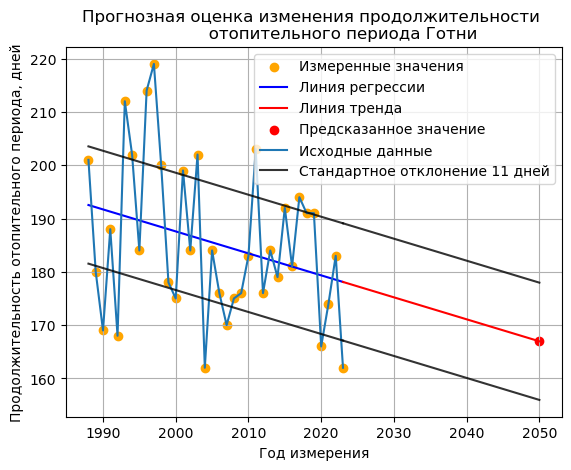

In [27]:
plt.scatter(X, y, color='orange', label='Измеренные значения')
plt.plot(X, regr.predict(X), color='blue', label='Линия регрессии')
plt.plot(feature_value, predicted_value, color='red', label='Линия тренда')
plt.scatter(2050, 167 , color='red', label='Предсказанное значение')
plt.plot(X, y, label='Исходные данные')
plt.plot(X, y_pred_2023_long - 11, color='black', alpha=0.8)
plt.plot(X, y_pred_2023_long + 11, color='black', alpha=0.8)
plt.plot(feature_value, predicted_value - 11, color='black', alpha=0.8)
plt.plot(feature_value, predicted_value + 11, color='black', alpha=0.8,
         label='Стандартное отклонение 11 дней')
plt.ylabel('Продолжительность отопительного периода, дней')
plt.title('Прогнозная оценка изменения продолжительности \n \
          отопительного периода Готни')
plt.xlabel('Год измерения')
plt.legend()
plt.grid(True)
plt.show()